# 星巴克毕业项目

### 简介

这个数据集是一些模拟 Starbucks rewards 移动 app 上用户行为的数据。每隔几天，星巴克会向 app 的用户发送一些推送。这个推送可能仅仅是一条饮品的广告或者是折扣券或 BOGO（买一送一）。一些顾客可能一连几周都收不到任何推送。 

顾客收到的推送可能是不同的，这就是这个数据集的挑战所在。

你的任务是将交易数据、人口统计数据和推送数据结合起来判断哪一类人群会受到某种推送的影响。这个数据集是从星巴克 app 的真实数据简化而来。因为下面的这个模拟器仅产生了一种饮品， 实际上星巴克的饮品有几十种。

每种推送都有有效期。例如，买一送一（BOGO）优惠券推送的有效期可能只有 5 天。你会发现数据集中即使是一些消息型的推送都有有效期，哪怕这些推送仅仅是饮品的广告，例如，如果一条消息型推送的有效期是 7 天，你可以认为是该顾客在这 7 天都可能受到这条推送的影响。

数据集中还包含 app 上支付的交易信息，交易信息包括购买时间和购买支付的金额。交易信息还包括该顾客收到的推送种类和数量以及看了该推送的时间。顾客做出了购买行为也会产生一条记录。 

同样需要记住有可能顾客购买了商品，但没有收到或者没有看推送。

### 示例

举个例子，一个顾客在周一收到了满 10 美元减 2 美元的优惠券推送。这个推送的有效期从收到日算起一共 10 天。如果该顾客在有效日期内的消费累计达到了 10 美元，该顾客就满足了该推送的要求。

然而，这个数据集里有一些地方需要注意。即，这个推送是自动生效的；也就是说，顾客收到推送后，哪怕没有看到，满足了条件，推送的优惠依然能够生效。比如，一个顾客收到了"满10美元减2美元优惠券"的推送，但是该用户在 10 天有效期内从来没有打开看到过它。该顾客在 10 天内累计消费了 15 美元。数据集也会记录他满足了推送的要求，然而，这个顾客并没被受到这个推送的影响，因为他并不知道它的存在。

### 清洗

清洗数据非常重要也非常需要技巧。

你也要考虑到某类人群即使没有收到推送，也会购买的情况。从商业角度出发，如果顾客无论是否收到推送都打算花 10 美元，你并不希望给他发送满 10 美元减 2 美元的优惠券推送。所以你可能需要分析某类人群在没有任何推送的情况下会购买什么。

### 最后一项建议

因为这是一个毕业项目，你可以使用任何你认为合适的方法来分析数据。例如，你可以搭建一个机器学习模型来根据人口统计数据和推送的种类来预测某人会花费多少钱。或者，你也可以搭建一个模型来预测该顾客是否会对推送做出反应。或者，你也可以完全不用搭建机器学习模型。你可以开发一套启发式算法来决定你会给每个顾客发出什么样的消息（比如75% 的35 岁女性用户会对推送 A 做出反应，对推送 B 则只有 40% 会做出反应，那么应该向她们发送推送 A）。


# 数据集

一共有三个数据文件：

* portfolio.json – 包括推送的 id 和每个推送的元数据（持续时间、种类等等）
* profile.json – 每个顾客的人口统计数据
* transcript.json – 交易、收到的推送、查看的推送和完成的推送的记录

以下是文件中每个变量的类型和解释 ：

**portfolio.json**
* id (string) – 推送的id
* offer_type (string) – 推送的种类，例如 BOGO、打折（discount）、信息（informational）
* difficulty (int) – 满足推送的要求所需的最少花费
* reward (int) – 满足推送的要求后给与的优惠
* duration (int) – 推送持续的时间，单位是天
* channels (字符串列表)

**profile.json**
* age (int) – 顾客的年龄 
* became_member_on (int) – 该顾客第一次注册app的时间
* gender (str) – 顾客的性别（注意除了表示男性的 M 和表示女性的 F 之外，还有表示其他的 O）
* id (str) – 顾客id
* income (float) – 顾客的收入

**transcript.json**
* event (str) – 记录的描述（比如交易记录、推送已收到、推送已阅）
* person (str) – 顾客id
* time (int) – 单位是小时，测试开始时计时。该数据从时间点 t=0 开始
* value - (dict of strings) – 推送的id 或者交易的数额

**注意：**如果你正在使用 Workspace，在读取文件前，你需要打开终端/命令行，运行命令 `conda update pandas` 。因为 Workspace 中的 pandas 版本不能正确读入 transcript.json 文件的内容，所以需要更新到 pandas 的最新版本。你可以单击 notebook 左上角橘黄色的 jupyter 图标来打开终端/命令行。  

下面两张图展示了如何打开终端/命令行以及如何安装更新。首先打开终端/命令行：
<img src="pic1.png"/>

然后运行上面的命令：
<img src="pic2.png"/>

最后回到这个 notebook（还是点击橘黄色的 jupyter 图标），再次运行下面的单元格就不会报错了。

In [2]:
import pandas as pd
import numpy as np
import math
import json
% matplotlib inline

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [5]:
portfolio

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2


In [11]:
portfolio.describe()

,difficulty,duration,reward
count,10.000000,10.000000,10.000000
mean,7.700000,6.500000,4.200000
std,5.831905,2.321398,3.583915
min,0.000000,3.000000,0.000000
25%,5.000000,5.000000,2.000000
50%,8.500000,7.000000,4.000000
75%,10.000000,7.000000,5.000000
max,20.000000,10.000000,10.000000


In [3]:
profile.head()

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


In [19]:
print(profile.shape)
print(profile.describe())
print(profile.isnull().sum())

(17000, 6)
                age         income  member_years
count  17000.000000   14825.000000  17000.000000
mean      62.531412   65404.991568      3.286164
std       26.738580   21598.299410      1.126641
min       18.000000   30000.000000      1.868493
25%       45.000000   49000.000000      2.438356
50%       58.000000   64000.000000      2.849315
75%       73.000000   80000.000000      4.035616
max      118.000000  120000.000000      6.863014
age                    0
became_member_on       0
gender              2175
user_id                0
income              2175
member_years           0
dtype: int64


发现这里出现了2175个性别、收入都为空的用户，且年龄显示为118，比较异常，猜测是错误录入导致

In [185]:
transcript.head()

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [38]:
transcript.isnull().sum()

event     0
person    0
time      0
value     0
dtype: int64

# I.数据清洗

发现3个数据集中存在一些问题如下：

1.命名不统一，如顾客id在profile中列名为'id'，但在transcript中列名为'person',需要统一为'user_id'

2.命名混淆，如portfolio中的列名'id'实际上是推送消息的id,需要明确为'offer_id'

3.一列包含多项内容：
a.portfolio的channels包含多个媒体渠道
b.transcript 的value列(dict of strings)是字典形式存储的字符串，包含推送的id 或者交易的数额，需要把这2部分内容拆分成2列以便分析,但这里部分键'offer_id'也被误写成了'offer id'

4.类别变量需转化为dummy variable:portfolio的channels包含多个媒体渠道，需按每个渠道拆分1列，以便于后续分析不同属性的用户，对于哪个媒体推送的优惠更易于反应

5.数据格式有误：profile中，became_member_on 列，应该调整为时间戳，以便计算用户的会龄

6.时间单位没有统一，如portfolio中的duration单位是天，而transcript中的time单位是小时

7.数据重复或缺失
profile中，gender和income 2列都有2175个缺失值，而且对应的age是118岁比较异常，考虑到目前无法再去验证这2175个人的年龄、性别、收入，建议删除这些缺失行

8.同一项观察值需要整理在一行
需要基于推送的id，把portfolio中推送的属性，合并到transcript中，以及基于顾客id，把profile中的用户属性合并到transcript中，以便分析不同属性的用户，对于不同属性推送的反应

In [3]:
profile=profile.rename(columns={'id':'user_id'}) 

In [4]:
transcript=transcript.rename(columns={'person':'user_id'}) 

In [5]:
portfolio=portfolio.rename(columns={'id':'offer_id','reward':'ini_reward'}) 

In [6]:
#把channels中各渠道变为dummy variable
channels=[]
for val in portfolio['channels']:
    channels.extend(val)
channels=set(channels)
print("The channels are {}.".format(channels))

The channels are {'mobile', 'web', 'social', 'email'}.


In [7]:
def add_channel(val):
    if channel in val:
        return 1
    else:
        return 0
    
for channel in channels:
    portfolio[channel]=portfolio['channels'].apply(add_channel)
    
del portfolio['channels']
portfolio.head()

,difficulty,duration,offer_id,offer_type,ini_reward,mobile,web,social,email
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,1,0,1,1
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,1,1,1
2,0,4,3f207df678b143eea3cee63160fa8bed,informational,0,1,1,0,1
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,1,0,1
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,0,1,0,1


In [8]:
#把transcript中各value字典的不同键和值拆分出来
values_temp=transcript['value'].values.tolist()
temp=pd.DataFrame(values_temp)
temp.head()

,amount,offer id,offer_id,reward
0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN
1,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN
2,NaN,2906b810c7d4411798c6938adc9daaa5,NaN,NaN
3,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN
4,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN


这里发现offer id 录入时存在笔误，即出现了offer id和offer_id 两种写法，且大部分数据被记录在了offer id下面

In [9]:
# 需要把offer_id的值复制到offer id列的相应行中
offer_id_idx=temp[temp['offer_id'].isnull()!=True].index.values
temp.loc[offer_id_idx,'offer id']=temp.loc[offer_id_idx,'offer_id']

# 删除数据不全的offer_id 列，并把列名offer id 改为offer_id, 并把temp dataframe合并回transcript中
del temp['offer_id']
temp=temp.rename(columns={'offer id':'offer_id'})
transcript_new=transcript.join(temp)
del transcript_new['value']


In [10]:
# 由于portfolio 中的优惠持续时间duration 单位为天，需要把transcript中的顾客反应时间（单位：小时），也统一转化为天，以和优惠券有效期对比
transcript_new['time']=transcript_new['time']/24
transcript_new.head()

,event,user_id,time,amount,offer_id,reward
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0.0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,offer received,a03223e636434f42ac4c3df47e8bac43,0.0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
2,offer received,e2127556f4f64592b11af22de27a7932,0.0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0.0,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN
4,offer received,68617ca6246f4fbc85e91a2a49552598,0.0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN


In [11]:
# 需要把注册时间转换为time格式，并增加"member_years"列计算每个会员至今已成为会员的年数
from datetime import date

profile['became_member_on']=profile['became_member_on'].astype(str)

def time(val):
    '''
    Input: 以整数形式存储的became_member_on数据
    Output:从会员注册日算起，至今的总年数
    '''
    year=int(val[:4])
    month=int(val[4:6])
    day=int(val[6:8])
    
    a=date(year,month,day)
    current_date=date(2020,6,7)
    
    total_years=(current_date-a).total_seconds()/(3600*24*365)
    
    return total_years
    
profile['member_years']=profile['became_member_on'].apply(time)


In [12]:
# 删除profile中有缺失值及异常值的行
not_null_row_idx=profile[profile['income'].isnull()!=True].index.values
profile_new=profile.loc[not_null_row_idx,:]
profile_new.head()

,age,became_member_on,gender,user_id,income,member_years
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0,2.898630
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,3.082192
5,68,20180426,M,e2127556f4f64592b11af22de27a7932,70000.0,2.117808
8,65,20180209,M,389bc3fa690240e798340f5a15918d5c,53000.0,2.326027
12,58,20171111,M,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,2.572603


In [174]:
profile_new.shape

(14825, 6)

In [12]:
transcript_new.head()

,event,user_id,time,amount,offer_id,reward
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0.0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,offer received,a03223e636434f42ac4c3df47e8bac43,0.0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
2,offer received,e2127556f4f64592b11af22de27a7932,0.0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0.0,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN
4,offer received,68617ca6246f4fbc85e91a2a49552598,0.0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN


In [13]:
portfolio.head()

,difficulty,duration,offer_id,offer_type,ini_reward,web,email,social,mobile
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,0,1,1,1
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,1,1,1
2,0,4,3f207df678b143eea3cee63160fa8bed,informational,0,1,1,0,1
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,1,0,1
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,1,1,0,0


In [13]:
#需要基于推送的id，把portfolio中推送的属性，合并到transcript中，
profile_new=profile_new[['user_id','age','gender','income','member_years']]
df_temp=pd.merge(transcript_new,portfolio,on='offer_id',how='outer')
#基于顾客id，把profile中的用户属性合并到transcript中，以便分析不同属性的用户，对于不同属性推送的反应
df_merged=pd.merge(df_temp,profile_new,on='user_id',how='inner')
df_merged.head()

,event,user_id,time,amount,offer_id,reward,difficulty,duration,offer_type,ini_reward,mobile,web,social,email,age,gender,income,member_years
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0.00,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5.0,7.0,bogo,5.0,1.0,1.0,0.0,1.0,75,F,100000.0,3.082192
1,offer viewed,78afa995795e4d85b5d9ceeca43f5fef,0.25,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5.0,7.0,bogo,5.0,1.0,1.0,0.0,1.0,75,F,100000.0,3.082192
2,offer completed,78afa995795e4d85b5d9ceeca43f5fef,5.50,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,5.0,7.0,bogo,5.0,1.0,1.0,0.0,1.0,75,F,100000.0,3.082192
3,offer received,78afa995795e4d85b5d9ceeca43f5fef,21.00,NaN,f19421c1d4aa40978ebb69ca19b0e20d,NaN,5.0,5.0,bogo,5.0,1.0,1.0,1.0,1.0,75,F,100000.0,3.082192
4,offer completed,78afa995795e4d85b5d9ceeca43f5fef,21.25,NaN,f19421c1d4aa40978ebb69ca19b0e20d,5.0,5.0,5.0,bogo,5.0,1.0,1.0,1.0,1.0,75,F,100000.0,3.082192


In [90]:
df_merged.isnull().sum()

event                0
user_id              0
time                 0
amount          113865
offer_id         97582
reward          182114
difficulty       97582
duration         97582
offer_type       97582
ini_reward       97582
email            97582
mobile           97582
web              97582
social           97582
age                  0
gender               0
income               0
member_years         0
dtype: int64

In [28]:
df_merged[df_merged['offer_id'].isnull()].head()

,event,user_id,time,amount,offer_id,reward,difficulty,duration,offer_type,ini_reward,web,email,social,mobile,age,gender,income,member_years
11,transaction,78afa995795e4d85b5d9ceeca43f5fef,5.50,19.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,F,100000.0,3.082192
12,transaction,78afa995795e4d85b5d9ceeca43f5fef,6.00,17.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,F,100000.0,3.082192
13,transaction,78afa995795e4d85b5d9ceeca43f5fef,9.25,19.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,F,100000.0,3.082192
14,transaction,78afa995795e4d85b5d9ceeca43f5fef,10.00,29.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,F,100000.0,3.082192
15,transaction,78afa995795e4d85b5d9ceeca43f5fef,15.75,23.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,F,100000.0,3.082192


针对合并后的数据，说明如下：

1.尽管在原先profile 数据集中，我们已经删除了2175个行性别、收入都为空值，年龄为118岁的异常用户数据，但在transcript数据中，仍包含了这部分用户的交易数据，由于他们的人口统计学属性难以补充，且总量占比较低（用户数占比：2175/17000=13%， 交易数占比：33772/306534=11%），因此在合并后的数据集中再次删除

2.发现部分交易，并没有对应的offer received 或viewed动作，因此是在用户没有收到或看到优惠信息情况下发生的，这部分不需要营销成本投入也会购买的忠实用户，是我们的宝藏，需后续重点分析其人口统计学特征

从利润最大化的商业角度思考，我希望回答以下几个问题：

1.受到优惠促销推送影响而去核销的用户总体特征（如年龄、性别、收入、成为会员的时间）有什么特点？

2.核销用户的特征，是否会随促销机制不同而有差异？

3.用户从看到消息，到产生购买的反应时间差异，是否和用户年龄、促销机制有关？

4.在受优惠影响的用户中，较高打开率、核销率用户人口属性有什么特点？（消息打开率（offer view/offer received） 在75% 以上，核销率（offer complete/offer view）在 50%以上）

5. 不同性别、年龄区间、收入区间的人，收到不同优惠后，最终核销购买的可能性是多少？

6. 活跃用户、受影响核销用户、无影响用户在测试时间内，贡献的人均价值差异是否有差异

7. 未能被浏览的信息推送，投放渠道有什么特点？

# II.数据分析

In [17]:
df_merged[(df_merged['offer_type']=='informational') & (df_merged['event']=='offer completed')]

,event,user_id,time,amount,offer_id,reward,difficulty,duration,offer_type,ini_reward,email,social,web,mobile,age,gender,income,member_years


In [16]:
df_merged[df_merged['user_id']=='fac7592dd8ee40f1a4f3b5952b25d8c0']

,event,user_id,time,amount,offer_id,reward,difficulty,duration,offer_type,ini_reward,social,web,email,mobile,age,gender,income,member_years
161374,offer received,fac7592dd8ee40f1a4f3b5952b25d8c0,17.00,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,20.0,10.0,discount,5.0,0.0,1.0,1.0,0.0,24.0,F,33000.0,2.005479
161375,offer viewed,fac7592dd8ee40f1a4f3b5952b25d8c0,18.50,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,20.0,10.0,discount,5.0,0.0,1.0,1.0,0.0,24.0,F,33000.0,2.005479
161376,offer completed,fac7592dd8ee40f1a4f3b5952b25d8c0,24.75,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,5.0,20.0,10.0,discount,5.0,0.0,1.0,1.0,0.0,24.0,F,33000.0,2.005479
161377,offer received,fac7592dd8ee40f1a4f3b5952b25d8c0,21.00,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,10.0,5.0,bogo,10.0,1.0,1.0,1.0,1.0,24.0,F,33000.0,2.005479
161378,offer viewed,fac7592dd8ee40f1a4f3b5952b25d8c0,21.50,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,10.0,5.0,bogo,10.0,1.0,1.0,1.0,1.0,24.0,F,33000.0,2.005479
161379,offer completed,fac7592dd8ee40f1a4f3b5952b25d8c0,24.75,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,10.0,10.0,5.0,bogo,10.0,1.0,1.0,1.0,1.0,24.0,F,33000.0,2.005479
161380,offer received,fac7592dd8ee40f1a4f3b5952b25d8c0,0.00,NaN,f19421c1d4aa40978ebb69ca19b0e20d,NaN,5.0,5.0,bogo,5.0,1.0,1.0,1.0,1.0,24.0,F,33000.0,2.005479
161381,offer viewed,fac7592dd8ee40f1a4f3b5952b25d8c0,0.50,NaN,f19421c1d4aa40978ebb69ca19b0e20d,NaN,5.0,5.0,bogo,5.0,1.0,1.0,1.0,1.0,24.0,F,33000.0,2.005479
161382,offer received,fac7592dd8ee40f1a4f3b5952b25d8c0,24.00,NaN,ae264e3637204a6fb9bb56bc8210ddfd,NaN,10.0,7.0,bogo,10.0,1.0,0.0,1.0,1.0,24.0,F,33000.0,2.005479
161383,offer completed,fac7592dd8ee40f1a4f3b5952b25d8c0,24.75,NaN,ae264e3637204a6fb9bb56bc8210ddfd,10.0,10.0,7.0,bogo,10.0,1.0,0.0,1.0,1.0,24.0,F,33000.0,2.005479


这里看到informational 的信息，可能因为不用核销，所以没有对应的offer completed,因此除了匹配用户在推送信息duration 期间的消费行为外，很难用其他方法把informational 信息的影响和用户的消费行为直接联系起来。

In [14]:
df_time=df_merged.groupby(['user_id','offer_id'])[['user_id','offer_id','event','time','duration']]

In [15]:
df_time_new=df_time.apply(lambda x:x)

In [16]:
#基于每个用户，对于不同offer_id的反应，判定其是否是在看到offer之后才去消费并核销优惠的
df_time_new=pd.pivot_table(df_time_new,index=['user_id','offer_id','duration'],columns=['event'],values=['time'])
df_time_new.head(10)

time  \
event                                                                      offer completed   
user_id                          offer_id                         duration                   
0009655768c64bdeb2e877511632db8f 2906b810c7d4411798c6938adc9daaa5 7.0                24.00   
                                 3f207df678b143eea3cee63160fa8bed 4.0                  NaN   
                                 5a8bc65990b245e5a138643cd4eb9837 3.0                  NaN   
                                 f19421c1d4aa40978ebb69ca19b0e20d 5.0                17.25   
                                 fafdcd668e3743c1bb461111dcafc2a4 10.0               22.00   
0011e0d4e6b944f998e987f904e8c1e5 0b1e1539f2cc45b7b9fa7c272da2e1d7 10.0               24.00   
                                 2298d6c36e964ae4a3e7e9706d1fb8c2 7.0                10.50   
                                 3f207df678b143eea3cee63160fa8bed 4.0                  NaN   
                                 5a8bc65990b245e5a138643cd4eb9837 3.0                  NaN   
                                 9b98b8c7a33c4b65b9aebfe6a799e6d9 7.0                24.00   

                                                                                           \
event                                                                      offer received   
user_id                          offer_id                         duration                  
0009655768c64bdeb2e877511632db8f 2906b810c7d4411798c6938adc9daaa5 7.0                24.0   
                                 3f207df678b143eea3cee63160fa8bed 4.0                14.0   
                                 5a8bc65990b245e5a138643cd4eb9837 3.0                 7.0   
                                 f19421c1d4aa40978ebb69ca19b0e20d 5.0                17.0   
                                 fafdcd668e3743c1bb461111dcafc2a4 10.0               21.0   
0011e0d4e6b944f998e987f904e8c1e5 0b1e1539f2cc45b7b9fa7c272da2e1d7 10.0               17.0   
                                 2298d6c36e964ae4a3e7e9706d1fb8c2 7.0                 7.0   
                                 3f207df678b143eea3cee63160fa8bed 4.0                 0.0   
                                 5a8bc65990b245e5a138643cd4eb9837 3.0                14.0   
                                 9b98b8c7a33c4b65b9aebfe6a799e6d9 7.0                21.0   

                                                                                         
event                                                                      offer viewed  
user_id                          offer_id                         duration               
0009655768c64bdeb2e877511632db8f 2906b810c7d4411798c6938adc9daaa5 7.0               NaN  
                                 3f207df678b143eea3cee63160fa8bed 4.0             15.50  
                                 5a8bc65990b245e5a138643cd4eb9837 3.0              8.00  
                                 f19421c1d4aa40978ebb69ca19b0e20d 5.0             19.00  
                                 fafdcd668e3743c1bb461111dcafc2a4 10.0            22.50  
0011e0d4e6b944f998e987f904e8c1e5 0b1e1539f2cc45b7b9fa7c272da2e1d7 10.0            18.00  
                                 2298d6c36e964ae4a3e7e9706d1fb8c2 7.0              7.75  
                                 3f207df678b143eea3cee63160fa8bed 4.0              0.25  
                                 5a8bc65990b245e5a138643cd4eb9837 3.0             14.75  
                                 9b98b8c7a33c4b65b9aebfe6a799e6d9 7.0             21.50

In [17]:
#未受到优惠券影响的第一种人，offer viewed 为NaN,但产生了offer completed的人
uninfluenced_users_1=df_time_new[(df_time_new['time']['offer viewed'].isnull()==True)&(df_time_new['time']['offer completed']>0)].reset_index()['user_id']

In [18]:
#未受到优惠券影响的第二种人，核销优惠后才看到offer的人
uninfluenced_users_2=df_time_new[((df_time_new['time']['offer viewed']-df_time_new['time']['offer completed'])>=0)&(df_time_new['time']['offer completed']>0)].reset_index()['user_id']

In [19]:
def restructure_df_time(df):
    offer_received=df.reset_index()['time']['offer received']
    offer_viewed=df.reset_index()['time']['offer viewed']
    offer_completed=df.reset_index()['time']['offer completed']
    duration=df.reset_index()['duration']
    offer_end=offer_received+duration
    
    user_id=df.reset_index()['user_id']
    offer_id=df.reset_index()['offer_id']
    
    df_time_res=pd.DataFrame({'user_id':user_id,'offer_id':offer_id,'offer_viewed':offer_viewed,
                              'offer_completed':offer_completed,'offer_received':offer_received,'offer_end':offer_end})
    
    df_time_res=pd.merge(df_time_res,portfolio,on='offer_id',how='outer')
    
    return df_time_res

In [28]:
#未受到优惠券影响的第三种人，即其transaction的时间，是在收到优惠券的影响周期之外的
#这里希望找到针对每个用户，其收到的各优惠券的影响周期取并集，然后再对比该用户哪个时间产生的transaction在该影响周期之外，即为非优惠券影响情况下的消费

from interval import Interval
from collections import defaultdict
def user_influenced_time():
    df_time_res=restructure_df_time(df_time_new)
    df_transaction=df_merged[df_merged['event']=='transaction'][['user_id','time','amount']]
    user_id_tran=df_transaction['user_id'].unique().tolist()
        
    time_range=[]
    user_time=defaultdict()
    
    try:
        for user_id in user_id_tran:
            df_time_temp=df_time_res[df_time_res['user_id']==user_id]
                                     
            idxs=df_time_temp.index.values
            
            for index in idxs:
                start_time=df_time_res.loc[index,'offer_received']
                end_time=df_time_res.loc[index,'offer_end']
           
                time_range_new=Interval(start_time,end_time)
                time_range.append(time_range_new)
            
            user_time[user_id]=time_range
    except:
        pass

    return user_time
            

In [29]:
user_time=user_influenced_time()
user_time['0009655768c64bdeb2e877511632db8f']

[Interval(7.0, 10.0, lower_closed=True, upper_closed=True),
 Interval(21.0, 26.0, lower_closed=True, upper_closed=True),
 Interval(0.0, 7.0, lower_closed=True, upper_closed=True),
 Interval(17.0, 24.0, lower_closed=True, upper_closed=True),
 Interval(17.0, 24.0, lower_closed=True, upper_closed=True),
 Interval(17.5, 20.5, lower_closed=True, upper_closed=True),
 Interval(7.0, 17.0, lower_closed=True, upper_closed=True),
 Interval(12.0, 19.0, lower_closed=True, upper_closed=True),
 Interval(7.0, 10.0, lower_closed=True, upper_closed=True),
 Interval(17.0, 22.0, lower_closed=True, upper_closed=True),
 Interval(15.0, 22.0, lower_closed=True, upper_closed=True),
 Interval(14.0, 21.0, lower_closed=True, upper_closed=True),
 Interval(21.0, 25.0, lower_closed=True, upper_closed=True),
 Interval(14.0, 21.0, lower_closed=True, upper_closed=True),
 Interval(0.0, 7.0, lower_closed=True, upper_closed=True),
 Interval(20.5, 25.5, lower_closed=True, upper_closed=True),
 Interval(17.0, 21.0, lower_clo

在筛选第三种人时，发现函数把所有用户的影响时间interval都放在1个用户上了，这里我没能成功debug，烦请老师指点一下

In [20]:
# 整理出未受到优惠影响就消费的用户（这里其实应该是三类人的集合，但因为我技术能力限制先合并了前二类）
uninfluenced_users= uninfluenced_users_1.append(uninfluenced_users_2)
uninfluenced_users=set(uninfluenced_users)
len(uninfluenced_users)

7134

In [21]:
df_time_res=restructure_df_time(df_time_new)
df_time_res.head()

,user_id,offer_id,offer_viewed,offer_completed,offer_received,offer_end,difficulty,duration,offer_type,ini_reward,mobile,web,social,email
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,NaN,24.00,24.0,31.0,10,7,discount,2,1,1,0,1
1,00426fe3ffde4c6b9cb9ad6d077a13ea,2906b810c7d4411798c6938adc9daaa5,NaN,NaN,20.5,27.5,10,7,discount,2,1,1,0,1
2,005500a7188546ff8a767329a2f7c76a,2906b810c7d4411798c6938adc9daaa5,NaN,NaN,17.0,24.0,10,7,discount,2,1,1,0,1
3,00715b6e55c3431cb56ff7307eb19675,2906b810c7d4411798c6938adc9daaa5,23.50,22.25,21.0,28.0,10,7,discount,2,1,1,0,1
4,00840a2ca5d2408e982d56544dc14ffd,2906b810c7d4411798c6938adc9daaa5,21.25,22.50,10.5,17.5,10,7,discount,2,1,1,0,1


In [23]:
df_uninfluenced=df_time_res[(df_time_res['offer_completed']>0)&
                            ((df_time_res['offer_viewed'].isnull()==True)|((df_time_res['offer_viewed']-df_time_res['offer_completed'])>=0))]
idx_influenced=np.setdiff1d(df_time_res.index.values,df_uninfluenced.index.values,assume_unique=True)
df_influenced=df_time_res.loc[idx_influenced,:]
df_influenced.head()

,user_id,offer_id,offer_viewed,offer_completed,offer_received,offer_end,difficulty,duration,offer_type,ini_reward,mobile,web,social,email
1,00426fe3ffde4c6b9cb9ad6d077a13ea,2906b810c7d4411798c6938adc9daaa5,NaN,NaN,20.5,27.5,10,7,discount,2,1,1,0,1
2,005500a7188546ff8a767329a2f7c76a,2906b810c7d4411798c6938adc9daaa5,NaN,NaN,17.0,24.0,10,7,discount,2,1,1,0,1
4,00840a2ca5d2408e982d56544dc14ffd,2906b810c7d4411798c6938adc9daaa5,21.25,22.5,10.5,17.5,10,7,discount,2,1,1,0,1
5,008d7088107b468893889da0ede0df5c,2906b810c7d4411798c6938adc9daaa5,NaN,NaN,7.0,14.0,10,7,discount,2,1,1,0,1
6,0099bf30e4cb4265875266eb3eb25eab,2906b810c7d4411798c6938adc9daaa5,24.00,NaN,22.5,29.5,10,7,discount,2,1,1,0,1


In [24]:
influenced_customers=df_influenced[df_influenced['offer_completed']>0]['user_id'].unique()

In [26]:
profile_influenced=profile_new[profile_new['user_id'].isin(influenced_customers)]
profile_influenced.head()

,user_id,age,gender,income,member_years
3,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,3.082192
5,e2127556f4f64592b11af22de27a7932,68,M,70000.0,2.117808
8,389bc3fa690240e798340f5a15918d5c,65,M,53000.0,2.326027
12,2eeac8d8feae4a8cad5a6af0499a211d,58,M,51000.0,2.572603
13,aa4862eba776480b8bb9c68455b8c2e1,61,F,57000.0,2.739726


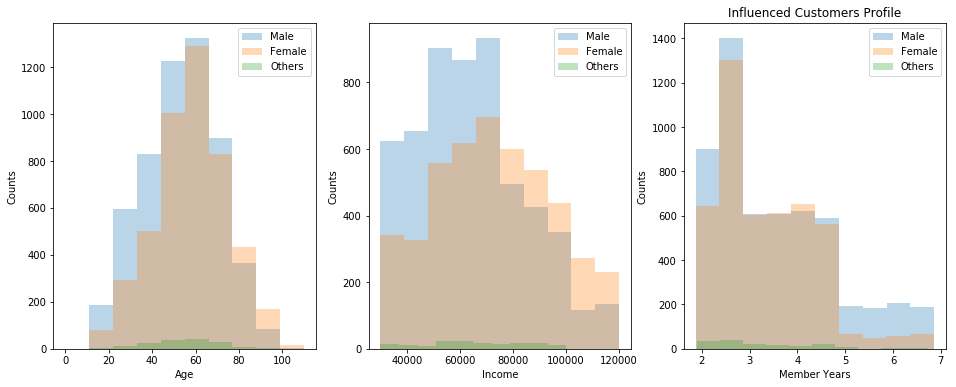

In [27]:
# 查看受到影响而核销的用户的人口特征，如性别、年龄、收入、会籍时间分布
import matplotlib.pyplot as plt
import seaborn as sns
profile_influenced_m=profile_influenced[profile_influenced['gender']=='M']
profile_influenced_f=profile_influenced[profile_influenced['gender']=='F']
profile_influenced_o=profile_influenced[profile_influenced['gender']=='O']

fig,ax = plt.subplots(1,3) 
plt.title('Influenced Customers Profile')

ax[0].hist(profile_influenced_m['age'],range=(0,110),bins=10,alpha=.3,label='Male')
ax[0].hist(profile_influenced_f['age'],range=(0,110),bins=10,alpha=.3,label='Female')
ax[0].hist(profile_influenced_o['age'],range=(0,110),bins=10,alpha=.3,label='Others')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Counts')
ax[0].legend()

ax[1].hist(profile_influenced_m['income'],alpha=.3,label='Male')
ax[1].hist(profile_influenced_f['income'],alpha=.3,label='Female')
ax[1].hist(profile_influenced_o['income'],alpha=.3,label='Others')
ax[1].set_xlabel('Income')
ax[1].set_ylabel('Counts')
ax[1].legend()


ax[2].hist(profile_influenced_m['member_years'],alpha=.3,label='Male')
ax[2].hist(profile_influenced_f['member_years'],alpha=.3,label='Female')
ax[2].hist(profile_influenced_o['member_years'],alpha=.3,label='Others')
ax[2].set_xlabel('Member Years')
ax[2].set_ylabel('Counts')
ax[2].legend()

fig.set_size_inches(16,6) 

被优惠券影响的用户年龄主要在45-70岁之间，男性60岁以下人群占比比女性多

被优惠券影响的男性收入主要在5-7.5万，其次为3-5万
被优惠券影响的女性收入主要在5-9万

大部分受优惠影响消费的女性用户，会籍时间在5年以内，而男性会籍在2-3年，5年以上，也有一定比例的用户会受到优惠影响消费
另，看到性别为others 的用户，在整体用户中占比极低，因此后续可视化中，将不特别体现others用户

In [29]:
# 针对产生offer completed 的用户，绘图查看不同促销机制与对应核销的用户属性
df_offer_customer=df_influenced[df_influenced['offer_completed']>0]
df_offer_customer=pd.merge(df_offer_customer,profile_new,on='user_id',how='outer')
df_offer_customer['purchase_time']=df_offer_customer['offer_completed']-df_offer_customer['offer_viewed']
df_offer_customer.head()

,user_id,offer_id,offer_viewed,offer_completed,offer_received,offer_end,difficulty,duration,offer_type,ini_reward,mobile,web,social,email,age,gender,income,member_years,purchase_time
0,00840a2ca5d2408e982d56544dc14ffd,2906b810c7d4411798c6938adc9daaa5,21.25,22.500,10.5,17.5,10.0,7.0,discount,2.0,1.0,1.0,0.0,1.0,26,M,61000.0,5.465753,1.250
1,00840a2ca5d2408e982d56544dc14ffd,fafdcd668e3743c1bb461111dcafc2a4,8.50,10.250,7.0,17.0,10.0,10.0,discount,2.0,1.0,1.0,1.0,1.0,26,M,61000.0,5.465753,1.750
2,00bbce6533f44ddeaf4dd32bcab55441,2906b810c7d4411798c6938adc9daaa5,17.00,19.500,17.0,24.0,10.0,7.0,discount,2.0,1.0,1.0,0.0,1.0,94,M,50000.0,5.528767,2.500
3,00bbce6533f44ddeaf4dd32bcab55441,9b98b8c7a33c4b65b9aebfe6a799e6d9,21.00,24.000,21.0,28.0,5.0,7.0,bogo,5.0,1.0,1.0,0.0,1.0,94,M,50000.0,5.528767,3.000
4,00bc42a62f884b41a13cc595856cf7c3,2906b810c7d4411798c6938adc9daaa5,0.25,11.625,10.5,17.5,10.0,7.0,discount,2.0,1.0,1.0,0.0,1.0,44,M,72000.0,4.408219,11.375


In [30]:
bogo_customer=df_offer_customer[df_offer_customer['offer_type']=='bogo'][['age','difficulty','income','member_years','gender','purchase_time']]
discount_customer=df_offer_customer[df_offer_customer['offer_type']=='discount'][['age','difficulty','income','member_years','gender','purchase_time']]
bogo_customer_male=bogo_customer[bogo_customer['gender']=='M']
bogo_customer_female=bogo_customer[bogo_customer['gender']=='F']

discount_customer_male=discount_customer[discount_customer['gender']=='M']
discount_customer_female=discount_customer[discount_customer['gender']=='F']


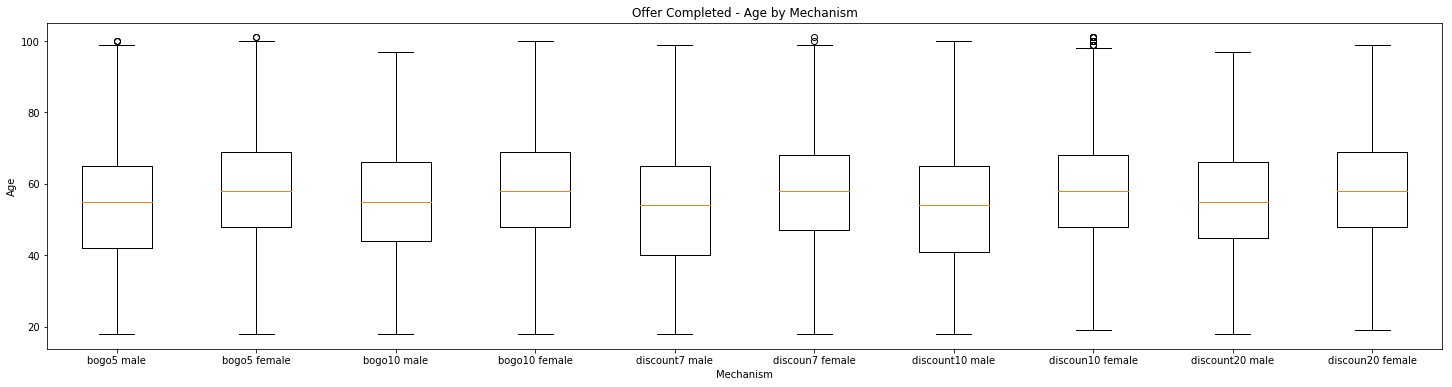

In [31]:
#按5种促销等级拆分，核销人群的性别、年龄特点
import matplotlib.pyplot as plt
plt.figure(figsize=(25,6))
plt.boxplot((bogo_customer_male[bogo_customer_male['difficulty']==5].age,
             bogo_customer_female[bogo_customer_female['difficulty']==5].age,
             
             bogo_customer_male[bogo_customer_male['difficulty']==10].age,
             bogo_customer_female[bogo_customer_female['difficulty']==10].age,
             
             discount_customer_male[discount_customer_male['difficulty']==7].age,
             discount_customer_female[discount_customer_female['difficulty']==7].age,
             
             discount_customer_male[discount_customer_male['difficulty']==10].age,
             discount_customer_female[discount_customer_female['difficulty']==10].age,
             
             discount_customer_male[discount_customer_male['difficulty']==20].age,
             discount_customer_female[discount_customer_female['difficulty']==20].age,
             ),
             
            labels=('bogo5 male','bogo5 female','bogo10 male','bogo10 female',
                    'discount7 male','discoun7 female',
                   'discount10 male','discoun10 female',
                   'discount20 male','discoun20 female'))
plt.title('Offer Completed - Age by Mechanism')
plt.ylabel('Age')
plt.xlabel('Mechanism')
plt.show()

不管是买1送1，还是折扣券，最终核销的女性，年龄中位数都要高于男性，且50%的女性用户，年龄分布在50-70岁，年龄随不同机制差异的变化不大
买1送1 10元门槛， 及核销discount 20元门槛（减5元）的男性，位于中间50%人群的年龄分布，要高于其他的优惠券男性核销中间50%人群的年龄

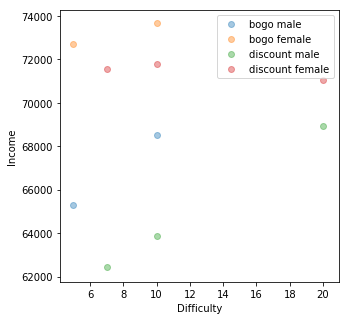

In [34]:
# 查看核销不同机制优惠券的人群收入差异
plt.figure(figsize=(5,5))
plt.scatter(bogo_customer_male.groupby('difficulty')['income'].mean().index.tolist(),bogo_customer_male.groupby('difficulty')['income'].mean(),alpha=0.4,label='bogo male')
plt.scatter(bogo_customer_female.groupby('difficulty')['income'].mean().index.tolist(),bogo_customer_female.groupby('difficulty')['income'].mean(),alpha=0.4,label='bogo female')

plt.scatter(discount_customer_male.groupby('difficulty')['income'].mean().index.tolist(),discount_customer_male.groupby('difficulty')['income'].mean(),alpha=0.4,label='discount male')
plt.scatter(discount_customer_female.groupby('difficulty')['income'].mean().index.tolist(),discount_customer_female.groupby('difficulty')['income'].mean(),alpha=0.4,label='discount female')

plt.ylabel('Income')
plt.xlabel('Difficulty')
plt.legend()
plt.show()

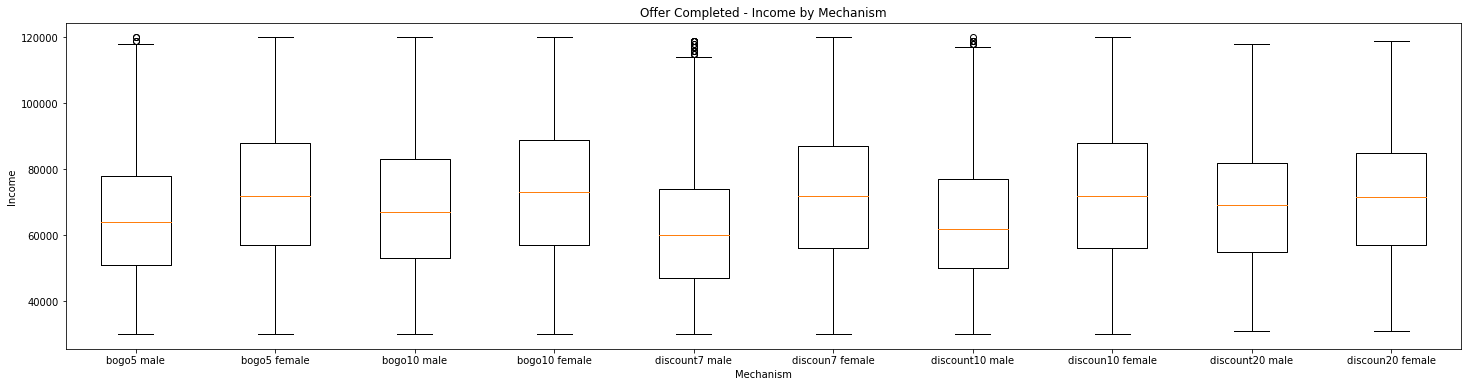

In [35]:
plt.figure(figsize=(25,6))
plt.boxplot((bogo_customer_male[bogo_customer_male['difficulty']==5].income,
             bogo_customer_female[bogo_customer_female['difficulty']==5].income,
             
             bogo_customer_male[bogo_customer_male['difficulty']==10].income,
             bogo_customer_female[bogo_customer_female['difficulty']==10].income,
             
             discount_customer_male[discount_customer_male['difficulty']==7].income,
             discount_customer_female[discount_customer_female['difficulty']==7].income,
             
             discount_customer_male[discount_customer_male['difficulty']==10].income,
             discount_customer_female[discount_customer_female['difficulty']==10].income,
             
             discount_customer_male[discount_customer_male['difficulty']==20].income,
             discount_customer_female[discount_customer_female['difficulty']==20].income,
             ),
             
            labels=('bogo5 male','bogo5 female','bogo10 male','bogo10 female',
                    'discount7 male','discoun7 female',
                   'discount10 male','discoun10 female',
                   'discount20 male','discoun20 female'))
plt.title('Offer Completed - Income by Mechanism')
plt.ylabel('Income')
plt.xlabel('Mechanism')
plt.show()

针对不同促销机制，除discount 20元门槛和20元门槛，女性的收入接近外，其他机制核销用户的收入水平都随门槛增加有明显增长,但女性平均收入都会明显高于男性

bogo 5元门槛，女性收入平均数(72,728)明显高于其他（66,766）及男性（62,278左右）

bogo 10元门槛,女性收入平均数(73,670)明显高于男性(68,545)及其他（67,233）

discount 7元门槛(减3元)，女性收入平均数(71,580)明显高于其他（64,204）及男性(62,434)

discount 10元门槛（减2元）,女性收入平均数(71,812)明显高于男性(64,762)及其他（63,865）

discount 20元门槛（减5元）,女性收入平均数(71,075)明显高于男性(69,185)及其他（68,915）

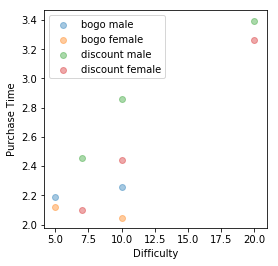

In [36]:
# 查看反应速度与促销机制的关系
plt.figure(figsize=(4,4))
plt.scatter(bogo_customer_male.groupby('difficulty')['purchase_time'].mean().index.tolist(),bogo_customer_male.groupby('difficulty')['purchase_time'].mean(),alpha=0.4,label='bogo male')
plt.scatter(bogo_customer_female.groupby('difficulty')['purchase_time'].mean().index.tolist(),bogo_customer_female.groupby('difficulty')['purchase_time'].mean(),alpha=0.4,label='bogo female')

plt.scatter(discount_customer_male.groupby('difficulty')['purchase_time'].mean().index.tolist(),discount_customer_male.groupby('difficulty')['purchase_time'].mean(),alpha=0.4,label='discount male')
plt.scatter(discount_customer_female.groupby('difficulty')['purchase_time'].mean().index.tolist(),discount_customer_female.groupby('difficulty')['purchase_time'].mean(),alpha=0.4,label='discount female')

plt.ylabel('Purchase Time')
plt.xlabel('Difficulty')
plt.legend()
plt.show()

所有优惠机制中，看过消息的，女性从收到消息到购买的反应速度，都明显快于男性，尤其是在discount(7元及10元门槛)
随difficulty(门槛)上升，反应时间也有明显增长

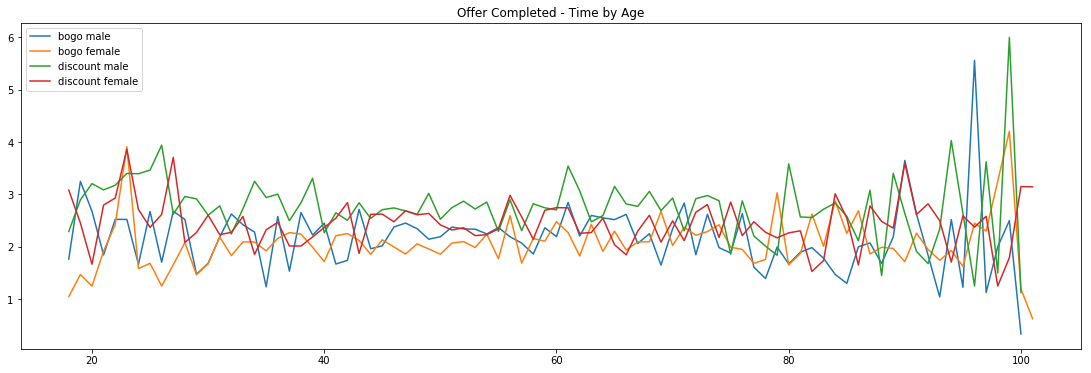

In [33]:
#按bogo及discount 2种主要机制拆分，用户从看到消息到购买的反馈时间，随年龄变化
plt.figure(figsize=(19,6))
plt.plot(bogo_customer_male.groupby('age')['purchase_time'].mean(),label='bogo male')
plt.plot(bogo_customer_female.groupby('age')['purchase_time'].mean(),label='bogo female')

plt.plot(discount_customer_male.groupby('age')['purchase_time'].mean(),label='discount male')
plt.plot(discount_customer_female.groupby('age')['purchase_time'].mean(),label='discount female')

plt.legend()
plt.title('Offer Completed - Time by Age')
plt.show()

对offer 从view到核销的时间，随年龄的变化，90岁以上人群震荡波动大，但普通男性、女性，在90岁以下的变化幅度相对较小，主要集中在1-4天之间。而较年轻女性（20-30岁），对于bogo的反馈核销速度最快，较年轻男性（20-30岁），对于discount的反馈核销速度较慢。

总体而言，各年龄段对于bogo的反馈核销速度，都要快于discount，而在20-40年龄段之间，差异更为明显。

In [182]:
discount_customer_male.groupby('difficulty').describe()

age                                                       \
             count       mean        std   min   25%   50%   75%    max   
difficulty                                                                
7.0         1772.0  52.709932  17.542316  18.0  40.0  54.0  65.0   99.0   
10.0        2783.0  53.186849  16.810728  18.0  41.0  54.0  65.0  100.0   
20.0         582.0  54.981100  15.762261  18.0  45.0  55.0  66.0   97.0   

            income                  ...     member_years            \
             count          mean    ...              75%       max   
difficulty                          ...                              
7.0         1772.0  62434.537246    ...         4.391781  6.863014   
10.0        2783.0  63865.612648    ...         4.465753  6.863014   
20.0         582.0  68915.807560    ...         4.297945  6.676712   

           purchase_time                                                 \
                   count      mean       std       min   25%   50%  75%   
difficulty                                                                
7.0               1772.0  2.455277  2.298956  0.083333  0.75  1.75  3.5   
10.0              2783.0  2.857341  2.501875  0.125000  1.00  2.00  4.0   
20.0               582.0  3.394688  2.754797  0.125000  1.25  2.75  5.0   

                       
                  max  
difficulty             
7.0         18.583333  
10.0        21.000000  
20.0        15.875000  

[3 rows x 32 columns]

In [37]:
# 查看打开率与人口属性的关系
df_influenced_temp=df_influenced.groupby('user_id').count()[['offer_received','offer_viewed','offer_completed']]
df_influenced_temp['view%']=df_influenced_temp['offer_viewed']/df_influenced_temp['offer_received']*100
df_influenced_temp['completed%']=df_influenced_temp['offer_completed']/df_influenced_temp['offer_viewed']*100
df_influenced_temp=pd.merge(df_influenced_temp,profile_new,on='user_id',how='inner')

df_influenced_temp.head()

,user_id,offer_received,offer_viewed,offer_completed,view%,completed%,age,gender,income,member_years
0,0009655768c64bdeb2e877511632db8f,2,2,0,100.0,0.000000,33,M,72000.0,3.131507
1,0011e0d4e6b944f998e987f904e8c1e5,5,5,3,100.0,60.000000,40,O,57000.0,2.410959
2,0020c2b971eb4e9188eac86d93036a77,4,3,2,75.0,66.666667,59,F,90000.0,4.263014
3,0020ccbbb6d84e358d3414a3ff76cffd,4,4,3,100.0,75.000000,24,F,60000.0,3.572603
4,003d66b6608740288d6cc97a6903f4f0,3,3,1,100.0,33.333333,26,F,73000.0,2.964384


In [40]:
# 筛选出view% 在75% 以上，completed%在 50% 以上的用户，查看人口属性特征
df_influenced_active=df_influenced_temp[(df_influenced_temp['view%']>75) &(df_influenced_temp['completed%']>50)]
active_customers=df_influenced_active['user_id'].unique()
df_influenced_active_m=df_influenced_active[df_influenced_active['gender']=='M']
df_influenced_active_f=df_influenced_active[df_influenced_active['gender']=='F']
df_influenced_active_o=df_influenced_active[df_influenced_active['gender']=='O']

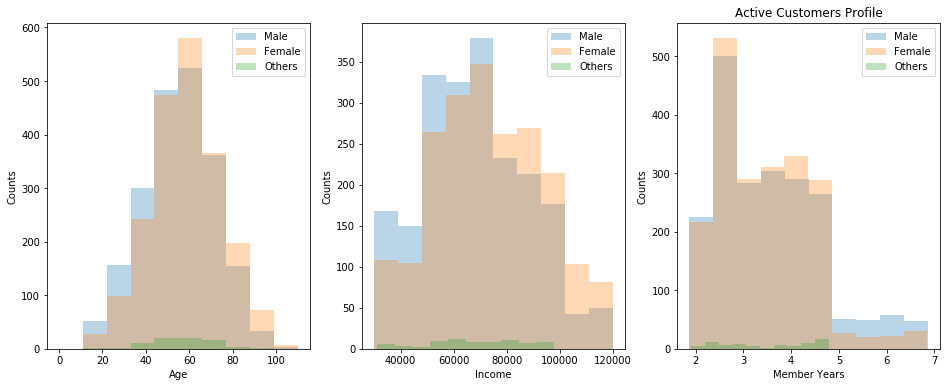

In [41]:

fig,ax = plt.subplots(1,3) 
plt.title('Active Customers Profile')
ax[0].hist(df_influenced_active_m['age'],range=(0,110),bins=10,alpha=.3,label='Male')
ax[0].hist(df_influenced_active_f['age'],range=(0,110),bins=10,alpha=.3,label='Female')
ax[0].hist(df_influenced_active_o['age'],range=(0,110),bins=10,alpha=.3,label='Others')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Counts')
ax[0].legend()


ax[1].hist(df_influenced_active_m['income'],alpha=.3,label='Male')
ax[1].hist(df_influenced_active_f['income'],alpha=.3,label='Female')
ax[1].hist(df_influenced_active_o['income'],alpha=.3,label='Others')

ax[1].set_xlabel('Income')
ax[1].set_ylabel('Counts')
ax[1].legend()

ax[2].hist(df_influenced_active_m['member_years'],alpha=.3,label='Male')
ax[2].hist(df_influenced_active_f['member_years'],alpha=.3,label='Female')
ax[2].hist(df_influenced_active_o['member_years'],alpha=.3,label='Others')

ax[2].set_xlabel('Member Years')
ax[2].set_ylabel('Counts')
ax[2].legend()

fig.set_size_inches(16,6) 

活跃用户的年龄，更多集中在45-75岁之间；收入集中在5-10万之间（男性相比女性，4-5万较低收入的占比较高）；会籍年限在5年以内

In [42]:
# 把人群按年龄、收入分组打标签
df_influenced_user=pd.merge(df_influenced,profile_new,on='user_id',how='inner')
df_influenced_user.head()

,user_id,offer_id,offer_viewed,offer_completed,offer_received,offer_end,difficulty,duration,offer_type,ini_reward,mobile,web,social,email,age,gender,income,member_years
0,00426fe3ffde4c6b9cb9ad6d077a13ea,2906b810c7d4411798c6938adc9daaa5,NaN,NaN,20.5,27.5,10,7,discount,2,1,1,0,1,19,F,65000.0,3.830137
1,00426fe3ffde4c6b9cb9ad6d077a13ea,5a8bc65990b245e5a138643cd4eb9837,1.50,NaN,0.0,3.0,0,3,informational,0,1,0,1,1,19,F,65000.0,3.830137
2,00426fe3ffde4c6b9cb9ad6d077a13ea,fafdcd668e3743c1bb461111dcafc2a4,7.75,10.75,7.0,17.0,10,10,discount,2,1,1,1,1,19,F,65000.0,3.830137
3,00426fe3ffde4c6b9cb9ad6d077a13ea,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,14.0,24.0,20,10,discount,5,0,1,0,1,19,F,65000.0,3.830137
4,005500a7188546ff8a767329a2f7c76a,2906b810c7d4411798c6938adc9daaa5,NaN,NaN,17.0,24.0,10,7,discount,2,1,1,0,1,56,M,47000.0,2.495890


In [43]:
def age(val):
    if 10<=val<20:
        return '10-20'
    elif 20<=val<30:
        return '20-30'
    elif 30<=val<40:
        return '30-40'
    elif 40<=val<50:
        return '40-50'
    elif 50<=val<60:
        return '50-60'
    elif 60<=val<70:
        return '60-70'
    elif 70<=val<80:
        return '70-80'
    else:
        return '>80'
    
df_influenced_user['age_group']=df_influenced_user['age'].apply(age)

In [44]:
def income(val):
    if 30000<=val<40000:
        return '30K-40K'
    elif 40000<=val<50000:
        return '40K-50K'
    elif 50000<=val<60000:
        return '50K-60K'
    elif 60000<=val<70000:
        return '60K-70K'
    elif 70000<=val<80000:
        return '70K-80K'
    else:
        return '>80K'
    
df_influenced_user['income_group']=df_influenced_user['income'].apply(income)

In [45]:
df_influenced_user.head()

,user_id,offer_id,offer_viewed,offer_completed,offer_received,offer_end,difficulty,duration,offer_type,ini_reward,mobile,web,social,email,age,gender,income,member_years,age_group,income_group
0,00426fe3ffde4c6b9cb9ad6d077a13ea,2906b810c7d4411798c6938adc9daaa5,NaN,NaN,20.5,27.5,10,7,discount,2,1,1,0,1,19,F,65000.0,3.830137,10-20,60K-70K
1,00426fe3ffde4c6b9cb9ad6d077a13ea,5a8bc65990b245e5a138643cd4eb9837,1.50,NaN,0.0,3.0,0,3,informational,0,1,0,1,1,19,F,65000.0,3.830137,10-20,60K-70K
2,00426fe3ffde4c6b9cb9ad6d077a13ea,fafdcd668e3743c1bb461111dcafc2a4,7.75,10.75,7.0,17.0,10,10,discount,2,1,1,1,1,19,F,65000.0,3.830137,10-20,60K-70K
3,00426fe3ffde4c6b9cb9ad6d077a13ea,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,14.0,24.0,20,10,discount,5,0,1,0,1,19,F,65000.0,3.830137,10-20,60K-70K
4,005500a7188546ff8a767329a2f7c76a,2906b810c7d4411798c6938adc9daaa5,NaN,NaN,17.0,24.0,10,7,discount,2,1,1,0,1,56,M,47000.0,2.495890,50-60,40K-50K


In [46]:
#按不同促销机制，拆分出受影响核销用户的数据
df_influenced_user_bogo5_ini=df_influenced_user[(df_influenced_user['offer_type']=='bogo')&(df_influenced_user['difficulty']==5)]
df_influenced_user_bogo10_ini=df_influenced_user[(df_influenced_user['offer_type']=='bogo')&(df_influenced_user['difficulty']==10)]
df_influenced_user_discount7_ini=df_influenced_user[(df_influenced_user['offer_type']=='discount')&(df_influenced_user['difficulty']==7)]
df_influenced_user_discount10_ini=df_influenced_user[(df_influenced_user['offer_type']=='discount')&(df_influenced_user['difficulty']==10)]
df_influenced_user_discount20_ini=df_influenced_user[(df_influenced_user['offer_type']=='discount')&(df_influenced_user['difficulty']==20)]


In [47]:
def df_restructure_age(df):
    df=df.groupby(['gender','age_group']).count()[['offer_received','offer_viewed','offer_completed']]    
    df['view%']=df['offer_viewed']/df['offer_received']*100
    df['completed%']=df['offer_completed']/df['offer_received']*100
        
    return df


df_influenced_user_bogo5=df_restructure_age(df_influenced_user_bogo5_ini)
df_influenced_user_bogo10=df_restructure_age(df_influenced_user_bogo10_ini)
df_influenced_user_discount7=df_restructure_age(df_influenced_user_discount7_ini)
df_influenced_user_discount10=df_restructure_age(df_influenced_user_discount10_ini)
df_influenced_user_discount20=df_restructure_age(df_influenced_user_discount20_ini)

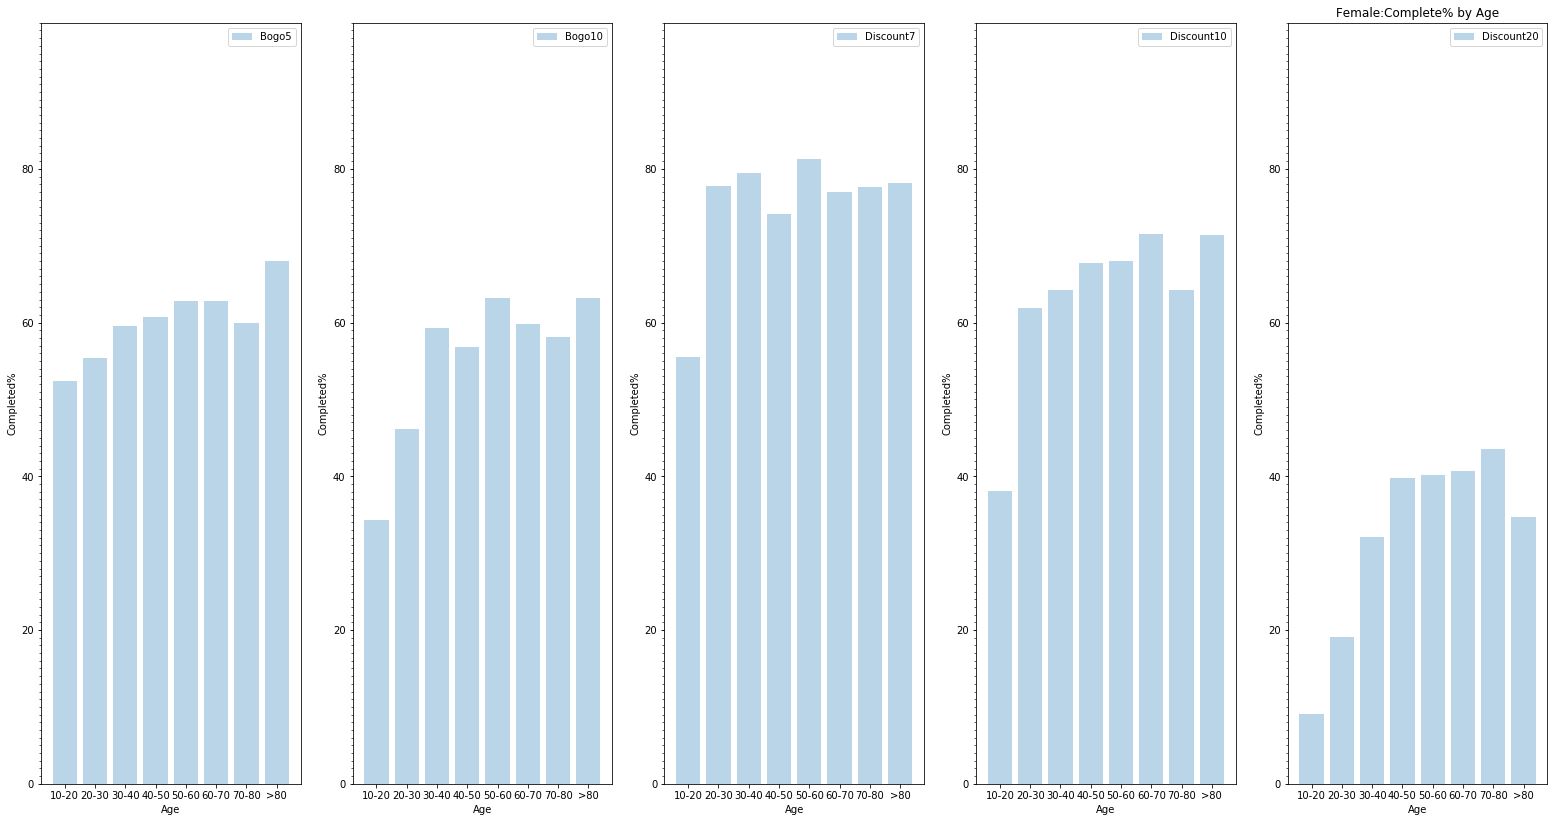

In [48]:
fig,ax = plt.subplots(1,5)

plt.title('Female:Complete% by Age')
x=df_influenced_user_discount20['completed%']['F'].index.values

ax[0].bar(x,df_influenced_user_bogo5['completed%']['F'].values,alpha=.3,label='Bogo5')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Completed%')
ax[0].set_yticks(np.arange(100),10)
ax[0].legend()


ax[1].bar(x,df_influenced_user_bogo10['completed%']['F'].values,alpha=.3,label='Bogo10')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Completed%')
ax[1].set_yticks(np.arange(100),10)
ax[1].legend()

ax[2].bar(x,df_influenced_user_discount7['completed%']['F'].values,alpha=.3,label='Discount7') 
ax[2].set_xlabel('Age')
ax[2].set_ylabel('Completed%')
ax[2].set_yticks(np.arange(100),10)
ax[2].legend()

ax[3].bar(x,df_influenced_user_discount10['completed%']['F'].values,alpha=.3,label='Discount10') 
ax[3].set_xlabel('Age')
ax[3].set_ylabel('Completed%')
ax[3].set_yticks(np.arange(100),10)
ax[3].legend()

ax[4].bar(x,df_influenced_user_discount20['completed%']['F'].values,alpha=.3,label='Discount20')    
ax[4].set_xlabel('Age')
ax[4].set_ylabel('Completed%')
ax[4].set_yticks(np.arange(100),10)
ax[4].legend()


fig.set_size_inches(27,14) 
plt.savefig('Complete% by Age_Female',dpi=100)

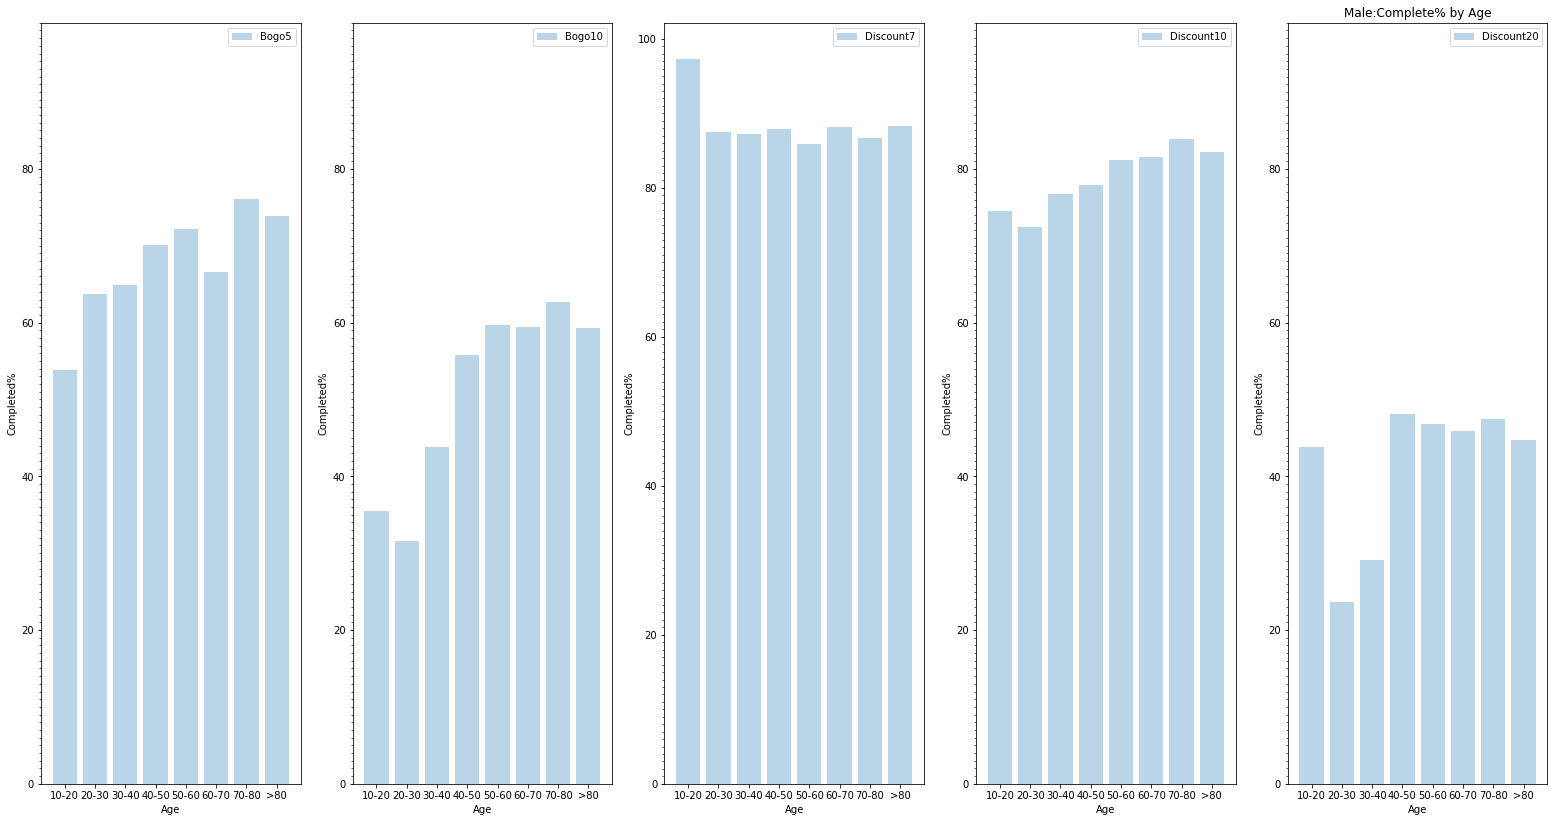

In [215]:
fig,ax = plt.subplots(1,5)

plt.title('Male:Complete% by Age')
x=df_influenced_user_discount20['completed%']['M'].index.values

ax[0].bar(x,df_influenced_user_bogo5['completed%']['M'].values,alpha=.3,label='Bogo5')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Completed%')
ax[0].set_yticks(np.arange(100),10)
ax[0].legend()


ax[1].bar(x,df_influenced_user_bogo10['completed%']['M'].values,alpha=.3,label='Bogo10')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Completed%')
ax[1].set_yticks(np.arange(100),10)
ax[1].legend()

ax[2].bar(x,df_influenced_user_discount7['completed%']['M'].values,alpha=.3,label='Discount7') 
ax[2].set_xlabel('Age')
ax[2].set_ylabel('Completed%')
ax[2].set_yticks(np.arange(100),10)
ax[2].legend()

ax[3].bar(x,df_influenced_user_discount10['completed%']['M'].values,alpha=.3,label='Discount10') 
ax[3].set_xlabel('Age')
ax[3].set_ylabel('Completed%')
ax[3].set_yticks(np.arange(100),10)
ax[3].legend()

ax[4].bar(x,df_influenced_user_discount20['completed%']['M'].values,alpha=.3,label='Discount20')    
ax[4].set_xlabel('Age')
ax[4].set_ylabel('Completed%')
ax[4].set_yticks(np.arange(100),10)
ax[4].legend()


fig.set_size_inches(27,14) 
plt.savefig('Complete% by Age_Male',dpi=100)

In [49]:
def df_restructure_income(df):
    df=df.groupby(['gender','income_group']).count()[['offer_received','offer_viewed','offer_completed']]    
    df['view%']=df['offer_viewed']/df['offer_received']*100
    df['completed%']=df['offer_completed']/df['offer_received']*100
        
    return df


df_influenced_income_bogo5=df_restructure_income(df_influenced_user_bogo5_ini)
df_influenced_income_bogo10=df_restructure_income(df_influenced_user_bogo10_ini)
df_influenced_income_discount7=df_restructure_income(df_influenced_user_discount7_ini)
df_influenced_income_discount10=df_restructure_income(df_influenced_user_discount10_ini)
df_influenced_income_discount20=df_restructure_income(df_influenced_user_discount20_ini)

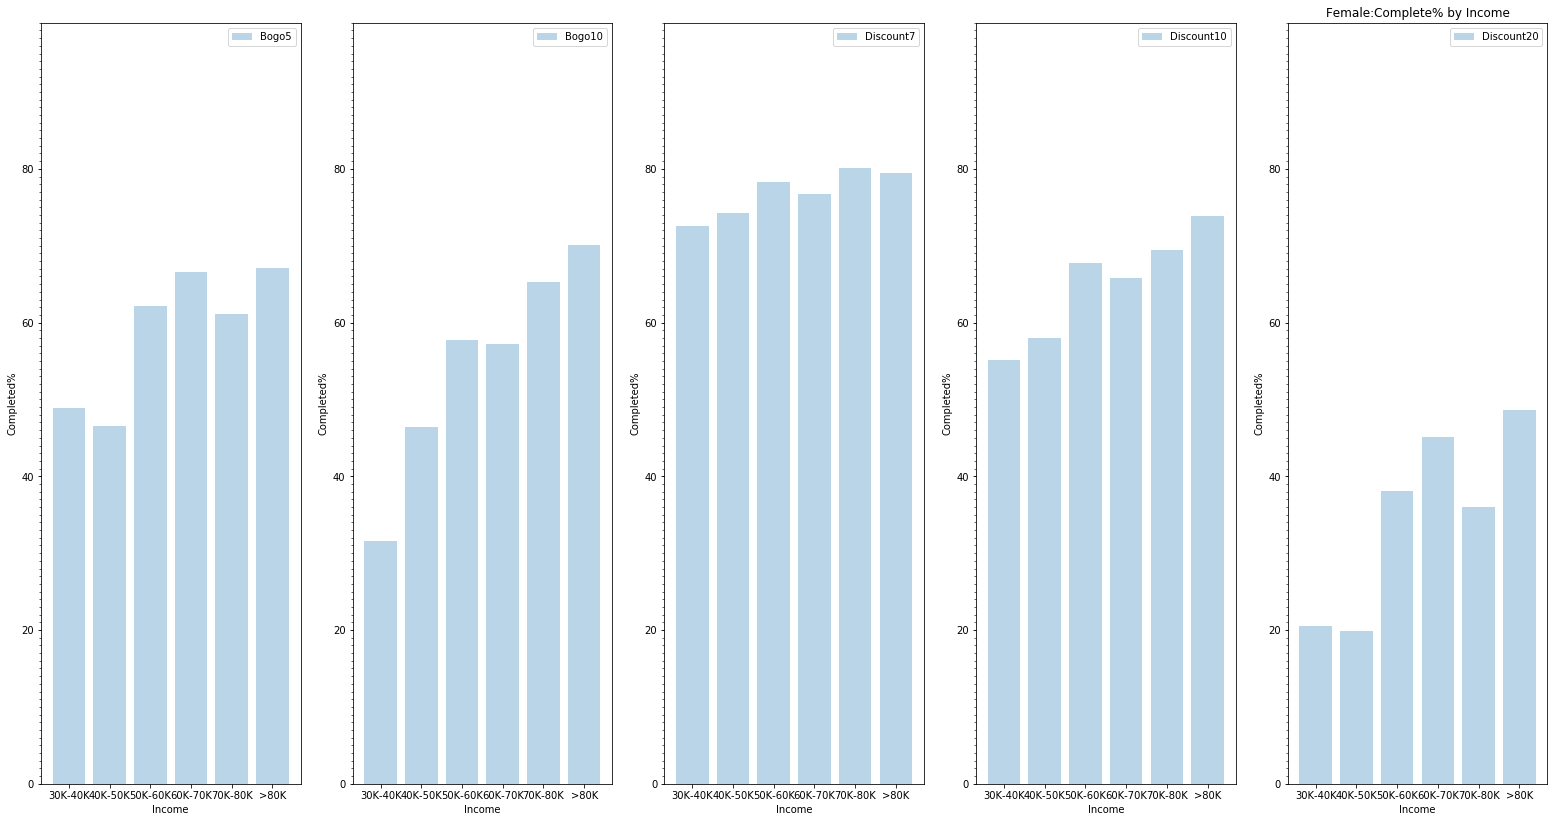

In [50]:
fig,ax = plt.subplots(1,5)

plt.title('Female:Complete% by Income')
x=df_influenced_income_discount20['completed%']['F'].index.values

ax[0].bar(x,df_influenced_income_bogo5['completed%']['F'].values,alpha=.3,label='Bogo5')
ax[0].set_xlabel('Income')
ax[0].set_ylabel('Completed%')
ax[0].set_yticks(np.arange(100),10)
ax[0].legend()


ax[1].bar(x,df_influenced_income_bogo10['completed%']['F'].values,alpha=.3,label='Bogo10')
ax[1].set_xlabel('Income')
ax[1].set_ylabel('Completed%')
ax[1].set_yticks(np.arange(100),10)
ax[1].legend()

ax[2].bar(x,df_influenced_income_discount7['completed%']['F'].values,alpha=.3,label='Discount7') 
ax[2].set_xlabel('Income')
ax[2].set_ylabel('Completed%')
ax[2].set_yticks(np.arange(100),10)
ax[2].legend()

ax[3].bar(x,df_influenced_income_discount10['completed%']['F'].values,alpha=.3,label='Discount10') 
ax[3].set_xlabel('Income')
ax[3].set_ylabel('Completed%')
ax[3].set_yticks(np.arange(100),10)
ax[3].legend()

ax[4].bar(x,df_influenced_income_discount20['completed%']['F'].values,alpha=.3,label='Discount20')    
ax[4].set_xlabel('Income')
ax[4].set_ylabel('Completed%')
ax[4].set_yticks(np.arange(100),10)
ax[4].legend()


fig.set_size_inches(27,14) 
plt.savefig('Complete% by Income_Female',dpi=100)

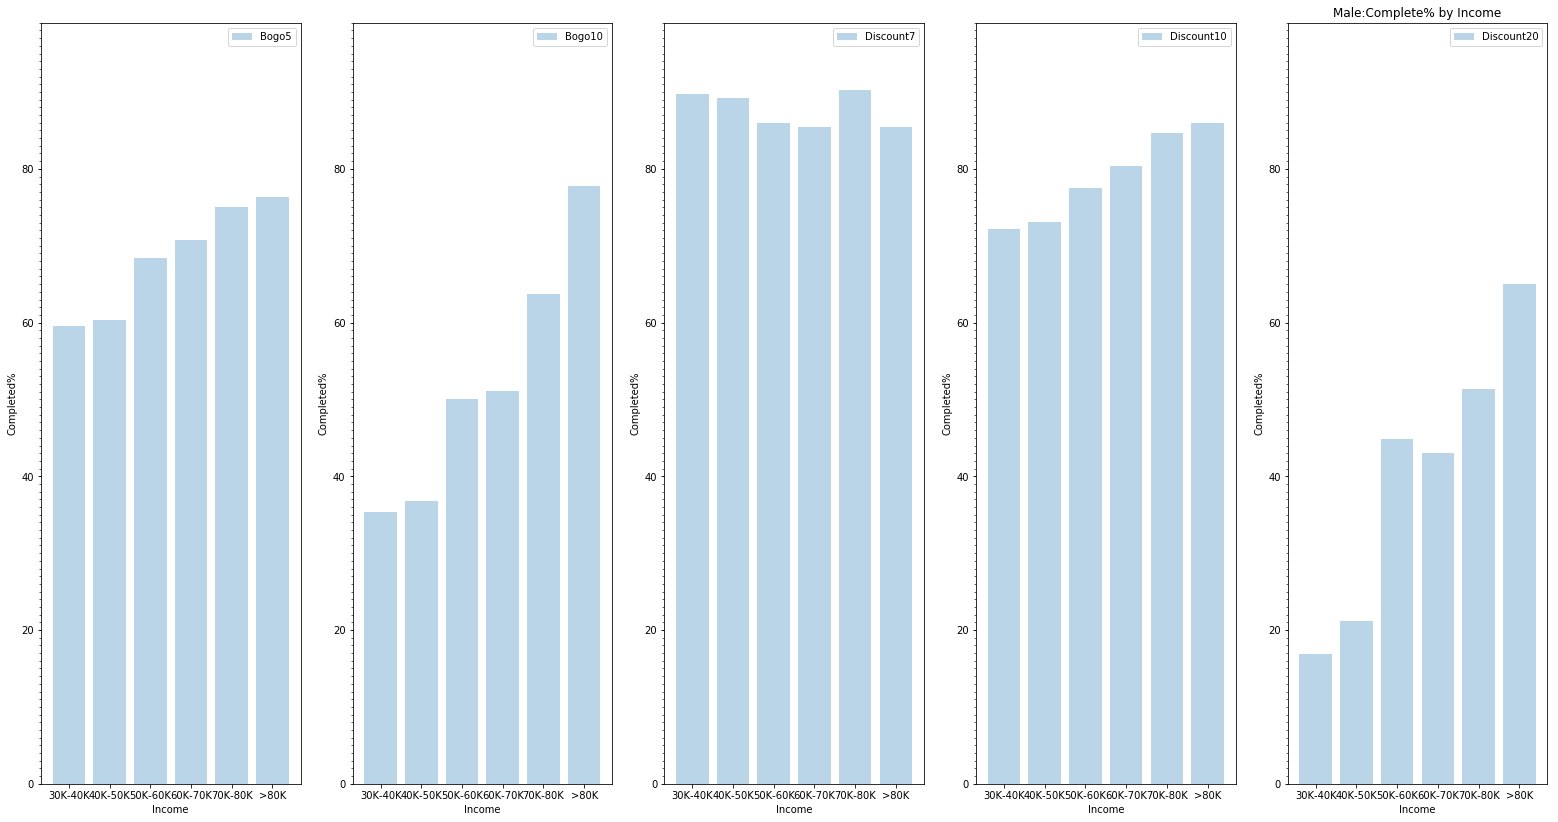

In [224]:
fig,ax = plt.subplots(1,5)

plt.title('Male:Complete% by Income')
x=df_influenced_income_discount20['completed%']['M'].index.values

ax[0].bar(x,df_influenced_income_bogo5['completed%']['M'].values,alpha=.3,label='Bogo5')
ax[0].set_xlabel('Income')
ax[0].set_ylabel('Completed%')
ax[0].set_yticks(np.arange(100),10)
ax[0].legend()


ax[1].bar(x,df_influenced_income_bogo10['completed%']['M'].values,alpha=.3,label='Bogo10')
ax[1].set_xlabel('Income')
ax[1].set_ylabel('Completed%')
ax[1].set_yticks(np.arange(100),10)
ax[1].legend()

ax[2].bar(x,df_influenced_income_discount7['completed%']['M'].values,alpha=.3,label='Discount7') 
ax[2].set_xlabel('Income')
ax[2].set_ylabel('Completed%')
ax[2].set_yticks(np.arange(100),10)
ax[2].legend()

ax[3].bar(x,df_influenced_income_discount10['completed%']['M'].values,alpha=.3,label='Discount10') 
ax[3].set_xlabel('Income')
ax[3].set_ylabel('Completed%')
ax[3].set_yticks(np.arange(100),10)
ax[3].legend()

ax[4].bar(x,df_influenced_income_discount20['completed%']['M'].values,alpha=.3,label='Discount20')    
ax[4].set_xlabel('Income')
ax[4].set_ylabel('Completed%')
ax[4].set_yticks(np.arange(100),10)
ax[4].legend()


fig.set_size_inches(27,14) 
plt.savefig('Complete% by Income_Male',dpi=100)

In [51]:
# 对比active customers,influenced customers,及uninfluenced customers在测试时间段内，贡献利润的差异
df_transaction=df_merged[df_merged['event']=='transaction'][['user_id','time','amount','gender','age','income']]
df_transaction['age_group']=df_transaction['age'].apply(age)
df_transaction['income_group']=df_transaction['income'].apply(income)
df_transaction.head()

,user_id,time,amount,gender,age,income,age_group,income_group
11,78afa995795e4d85b5d9ceeca43f5fef,5.50,19.89,F,75,100000.0,70-80,>80K
12,78afa995795e4d85b5d9ceeca43f5fef,6.00,17.78,F,75,100000.0,70-80,>80K
13,78afa995795e4d85b5d9ceeca43f5fef,9.25,19.67,F,75,100000.0,70-80,>80K
14,78afa995795e4d85b5d9ceeca43f5fef,10.00,29.72,F,75,100000.0,70-80,>80K
15,78afa995795e4d85b5d9ceeca43f5fef,15.75,23.93,F,75,100000.0,70-80,>80K


In [52]:
df_transaction_active=df_transaction[df_transaction['user_id'].isin(active_customers)]
df_transaction_influenced=df_transaction[df_transaction['user_id'].isin(influenced_customers)]
df_transaction_uninfluenced=df_transaction[df_transaction['user_id'].isin(uninfluenced_users)]

df_active=pd.DataFrame(df_transaction_active.groupby(['gender','age_group','user_id'])['amount'].sum())
df_active=pd.DataFrame(df_active.groupby(['gender','age_group'])['amount'].mean())

df_influenced=pd.DataFrame(df_transaction_influenced.groupby(['gender','age_group','user_id'])['amount'].sum())
df_influenced=pd.DataFrame(df_influenced.groupby(['gender','age_group'])['amount'].mean())

df_uninfluenced_new=pd.DataFrame(df_transaction_uninfluenced.groupby(['gender','age_group','user_id'])['amount'].sum())
df_uninfluenced_new=pd.DataFrame(df_uninfluenced_new.groupby(['gender','age_group'])['amount'].mean())

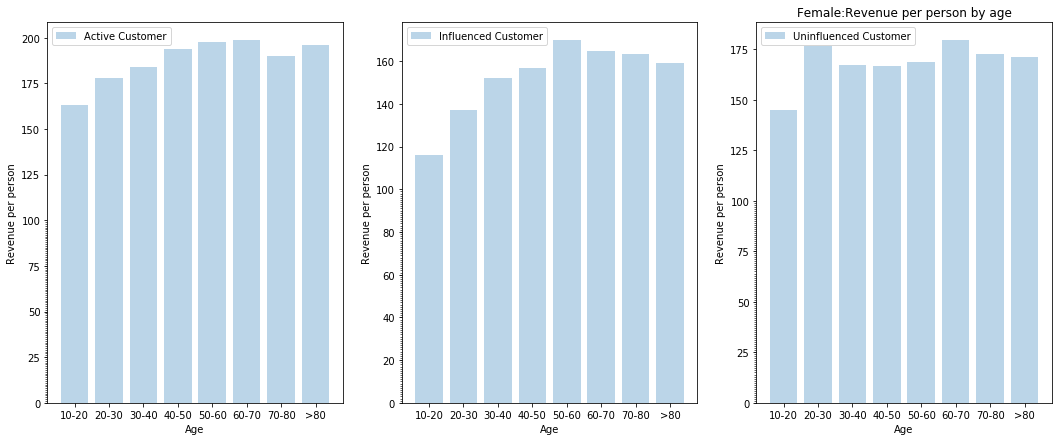

In [54]:
fig,ax = plt.subplots(1,3)

plt.title('Female:Revenue per person by age')
x=df_active['amount']['F'].index.values

ax[0].bar(x,df_active['amount']['F'].values,alpha=.3,label='Active Customer')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Revenue per person')
ax[0].set_yticks(np.arange(100),10)
ax[0].legend()


ax[1].bar(x,df_influenced['amount']['F'].values,alpha=.3,label='Influenced Customer')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Revenue per person')
ax[1].set_yticks(np.arange(100),10)
ax[1].legend()

ax[2].bar(x,df_uninfluenced_new['amount']['F'].values,alpha=.3,label='Uninfluenced Customer')
ax[2].set_xlabel('Age')
ax[2].set_ylabel('Revenue per person')
ax[2].set_yticks(np.arange(100),10)
ax[2].legend()

fig.set_size_inches(18,7) 
plt.savefig('Female:Revenue per person by age',dpi=100)

相同age group中, view%及complete%较高的活跃顾客，贡献的人均revenue 要高于普通收到促销信息推送的顾客
而uninfluenced 的顾客，整体来看，也好于普通收到促销信息后核销的顾客

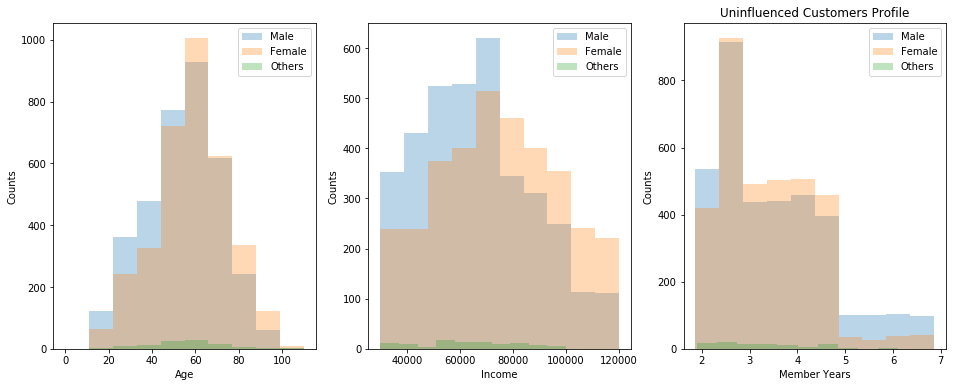

In [55]:
# 未看到促销信息推送，但产生了购买的用户画像
uninfluenced_customers=df_transaction_uninfluenced['user_id'].unique()
profile_uninfluenced=profile_new[profile_new['user_id'].isin(uninfluenced_customers)]

profile_uninfluenced_m=profile_uninfluenced[profile_uninfluenced['gender']=='M']
profile_uninfluenced_f=profile_uninfluenced[profile_uninfluenced['gender']=='F']
profile_uninfluenced_o=profile_uninfluenced[profile_uninfluenced['gender']=='O']

fig,ax = plt.subplots(1,3) 
plt.title('Uninfluenced Customers Profile')

ax[0].hist(profile_uninfluenced_m['age'],range=(0,110),bins=10,alpha=.3,label='Male')
ax[0].hist(profile_uninfluenced_f['age'],range=(0,110),bins=10,alpha=.3,label='Female')
ax[0].hist(profile_uninfluenced_o['age'],range=(0,110),bins=10,alpha=.3,label='Others')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Counts')
ax[0].legend()

ax[1].hist(profile_uninfluenced_m['income'],alpha=.3,label='Male')
ax[1].hist(profile_uninfluenced_f['income'],alpha=.3,label='Female')
ax[1].hist(profile_uninfluenced_o['income'],alpha=.3,label='Others')
ax[1].set_xlabel('Income')
ax[1].set_ylabel('Counts')
ax[1].legend()


ax[2].hist(profile_uninfluenced_m['member_years'],alpha=.3,label='Male')
ax[2].hist(profile_uninfluenced_f['member_years'],alpha=.3,label='Female')
ax[2].hist(profile_uninfluenced_o['member_years'],alpha=.3,label='Others')
ax[2].set_xlabel('Member Years')
ax[2].set_ylabel('Counts')
ax[2].legend()

fig.set_size_inches(16,6) 

In [59]:
df_not_view=df_time_res[df_time_res['offer_viewed'].isnull()==True]

In [60]:
df_not_view.head()

,user_id,offer_id,offer_viewed,offer_completed,offer_received,offer_end,difficulty,duration,offer_type,ini_reward,mobile,web,social,email
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,NaN,24.0,24.0,31.0,10,7,discount,2,1,1,0,1
1,00426fe3ffde4c6b9cb9ad6d077a13ea,2906b810c7d4411798c6938adc9daaa5,NaN,NaN,20.5,27.5,10,7,discount,2,1,1,0,1
2,005500a7188546ff8a767329a2f7c76a,2906b810c7d4411798c6938adc9daaa5,NaN,NaN,17.0,24.0,10,7,discount,2,1,1,0,1
5,008d7088107b468893889da0ede0df5c,2906b810c7d4411798c6938adc9daaa5,NaN,NaN,7.0,14.0,10,7,discount,2,1,1,0,1
8,00aee28bbb3848dd8a31f0c91dc267dd,2906b810c7d4411798c6938adc9daaa5,NaN,NaN,21.0,28.0,10,7,discount,2,1,1,0,1


In [61]:
df_not_view.groupby(['offer_type','difficulty']).mean()[['mobile','web','social','email']]

mobile       web    social  email
offer_type    difficulty                                   
bogo          5              1.0  1.000000  0.065905    1.0
              10             1.0  0.239625  1.000000    1.0
discount      7              1.0  1.000000  1.000000    1.0
              10             1.0  1.000000  0.064429    1.0
              20             0.0  1.000000  0.000000    1.0
informational 0              1.0  0.823941  0.176059    1.0

针对优惠券没有被打开查看的情况，建议适当尝试新的渠道触达用户，如bogo(5元券)，discount (10元&20元门槛券)，info消息可以尝试更多的social 渠道，bogo(10元券)可以多投放web渠道